In [61]:
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import json
from torch.utils.data import DataLoader , TensorDataset
df = pd.read_csv('telemetry_watch.csv')

from sklearn import preprocessing 



In [62]:
df = pd.read_csv('telemetry_watch.csv')
df

,created_at,GRMS_X,GRMS_Y,GRMS_Z,VRMS_X,VRMS_Y,VRMS_Z,temperature
0,2022-11-07 08:26:41,0.006375,0.005954,0.007951,0.151145,0.110155,0.125084,27.559999
1,2022-11-09 11:04:48,0.006427,0.005864,0.007928,0.115720,0.074589,0.149957,27.350000
2,2022-11-09 12:14:47,0.006403,0.005863,0.007943,0.132268,0.104184,0.158802,27.070000
3,2022-11-09 13:24:57,0.006389,0.005874,0.008031,0.091605,0.094042,0.174732,27.110001
4,2022-11-09 14:34:26,0.006411,0.005827,0.007912,0.113345,0.080807,0.156353,26.559999
...,...,...,...,...,...,...,...,...
431,2022-11-30 05:11:09,0.006391,0.005834,0.007859,0.107086,0.111417,0.136698,27.100000
432,2022-11-30 06:20:24,0.006408,0.005813,0.007911,0.124697,0.089609,0.096285,27.120001
433,2022-11-30 07:29:55,0.006417,0.005836,0.007882,0.101552,0.106846,0.191693,26.969999
434,2022-11-30 08:39:24,0.006364,0.005902,0.007834,0.126536,0.080714,0.165469,24.820000


In [63]:
''' Read the json files and add the labels to our dataframe

'''


def read_json(filename):
  with open('grmsx_labels.json') as user_file:
    file_contents = user_file.read()
    

  parsed_json = json.loads(file_contents)
  parsed_json = parsed_json[0]

  parsed_json= parsed_json['annotations'][0]['result']
  parsed_json

  labels = []

  labels_gx = []
  is_inst = []

  for i in range(436):
      labels_gx.append('label')
      is_inst.append('No')

  for elem in parsed_json:
      start_idx = elem['value']['start']
      end_idx = elem['value']['end']
      label = elem['value']['timeserieslabels'][0]
      

      
      for i in range(start_idx, end_idx + 1 ):
        
        
        if label == 'Instant Change':
          is_inst[i] = 'Yes'
          continue

        else:
          is_inst[i] = 'No'
          labels_gx[i] = (label)
  return labels_gx, is_inst


In [64]:

filename = 'grmsx_labels.json'
labels_gx, is_instgx = read_json(filename)

labels = []
is_inst = [] 

labels.extend(labels_gx)
is_inst.extend(is_instgx)


filename = 'grmsy_labels.json'
labels_gy, is_instgy = read_json(filename)

labels.extend(labels_gy)
is_inst.extend(is_instgy)

filename = 'grmsz_labels.json'
labels_gz, is_instgz = read_json(filename)

labels.extend(labels_gz)
is_inst.extend(is_instgz)

filename = 'vrmsx_labels.json'
labels_vx, is_instvx = read_json(filename)

labels.extend(labels_vx)
is_inst.extend(is_instvx)

filename = 'vrmsy_labels.json'
labels_vy, is_instvy = read_json(filename)

labels.extend(labels_vy)
is_inst.extend(is_instvy)

filename = 'vrmsz_labels.json'
labels_vz, is_instvz = read_json(filename)

labels.extend(labels_vz)
is_inst.extend(is_instvz)

filename = 'temp_labels.json'
labels_temp, is_inst_temp = read_json(filename)

labels.extend(labels_temp)
is_inst.extend(is_inst_temp)


In [65]:
# creating dataset and scaling values to combine 


def scale_data(scaler, data):
    data = np.array(data)
    data = data.reshape(-1,1)
    data = scaler.fit_transform(data)
    
    return data
    
data = []
scaler = MinMaxScaler()

grmsx_data = scale_data(scaler, df.GRMS_X)
data.extend(grmsx_data)

grmsy_data = scale_data(scaler, df.GRMS_Y)
data.extend(grmsy_data)

grmsz_data = scale_data(scaler, df.GRMS_Z)
data.extend(grmsz_data)

vrmsx_data = scale_data(scaler, df.VRMS_X)
data.extend(vrmsx_data)

vrmsy_data = scale_data(scaler, df.VRMS_Y)
data.extend(vrmsy_data)

vrmsz_data = scale_data(scaler, df.VRMS_Z)
data.extend(vrmsz_data)

temp_data = scale_data(scaler, df.temperature)
data.extend(temp_data)



In [66]:

new_data = []

for i in range(len(data)):
    new_data.append(data[i][0])
    
data = new_data
data
def create_dataframe(values, labels,is_inst):
  df = pd.DataFrame()
  df['Values'] = values
  df['Labels'] = labels
  df['is_instant'] = is_inst
  
  return df

values = data
labels = labels
is_inst = is_inst


In [67]:
# get rid of non label

df_merged = create_dataframe(values, labels, is_inst)
df_merged.drop(df_merged[df_merged['Labels'] == 'label'].index, inplace = True)
df_merged


,Values,Labels,is_instant
0,0.000123,Stable,No
1,0.000241,Stable,No
2,0.000186,Stable,No
3,0.000155,Stable,No
4,0.000204,Stable,No
...,...,...,...
3047,0.097291,Stable,No
3048,0.098054,Stable,No
3049,0.092331,Stable,No
3050,0.010301,Stable,No


In [68]:
fig = px.scatter(df_merged, y ='Values', color = 'Labels', labels = {"Labels":"Labels"}, title= "Data vs Labels")
fig.show()


In [69]:
df_merged

,Values,Labels,is_instant
0,0.000123,Stable,No
1,0.000241,Stable,No
2,0.000186,Stable,No
3,0.000155,Stable,No
4,0.000204,Stable,No
...,...,...,...
3047,0.097291,Stable,No
3048,0.098054,Stable,No
3049,0.092331,Stable,No
3050,0.010301,Stable,No


our random array is: [1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1]
data now is: [0.0, 0.076727163375782, 0.153454326751564, 0.230181490127346, 0.306908653503128, 0.38363581687891, 0.460362980254692, 0.537090143630474, 0.613817307006256, 0.690544470382038, 0.76727163375782, 0.843998797133602, 0.920725960509384, 0.997453123885166, 1.074180287260948, 1.15090745063673, 1.227634614012512, 1.304361777388294, 1.381088940764076, 1.457816104139858, 1.53454326751564, 1.611270430891422, 1.687997594267204, 1.764724757642986, 1.841451921018768, 1.91817908439455, 1.994906247770332, 2.071633411146114, 2.148360574521896]
data now is: [0.0, 0.076727163375782, 0.153454326751564, 0.230181490127346, 0.306908653503128, 0.38363581687891, 0.460362980254692, 0.537090143630474, 0.613817307006256, 0.690544470382038, 0.76727163375782, 0.843998797133602, 0.920725960509384, 0.997453123885166, 1.074180287260948, 1.15090745063673, 1.227634614012512, 1.304361777388294, 1.381088940764076, 1.457816104139858, 1.53454326751

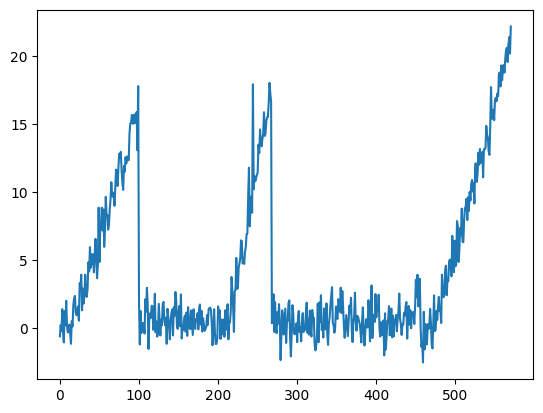

In [70]:
def stable_data_generator(mean, seq_length):
    data = [mean] * seq_length
    return data

def linear_data_generator(slope,start, seq_length):
        
    end = start + seq_length 
    x = [start] * seq_length
    #print((x))
    for i in range(len(x)):
        x[i] = i*slope + start
        
    #print(x)
    return x


def awgn_generator(data,std_dev ):
    noise = np.random.normal(0, std_dev, len(data))
    return noise

def instant_change(data, idx, percent_change):
    data[idx] = data[idx] * (1 + percent_change)

def create_random_array(num_zeros,num_ones):
    total_elements = num_zeros + num_ones
    
    zeros = [0] * num_zeros
    ones = [1] * num_ones
    random_array = zeros + ones
    
    np.random.shuffle(random_array)
    print(f"our random array is: {random_array}")
    
    return random_array

def create_random_data(array, num_inst, stab_upper_bound, linear_upper_bound,change_percent):
    data = []
    labels= []
    is_inst = []
    for i in range(len(array)):
        if array[i] == 0 :
            # data.append(np.random.randint(0,3))

            mean = np.random.uniform(0,stab_upper_bound)
            seq_length = np.random.randint(0,100)
            cur_data = stable_data_generator(mean, seq_length)
            data.extend(cur_data)
            # print(f"current data to append {cur_data}")

            for i in range (seq_length):
                labels.append('Stable')
                is_inst.append('No')
                
        else:
            length = len(data)
            if length == 0 :
                start = np.random.randint(0,3)
            else:
                start = data[length -1]
                
                
            slope = np.random.uniform(0,linear_upper_bound)
    
            seq_length = np.random.randint(0,100)
            cur_data = linear_data_generator(slope,start,seq_length)
            data.extend(cur_data)
            # print(f"current data to append {cur_data}")
            for i in range(seq_length):  
                labels.append('Linear')
                is_inst.append('No')
                
        print(f"data now is: {data}")
     
     
    print(f'data length: {len(data)}, is_inst length : {len(is_inst)}')    
    
    rand_ind = np.random.randint(0,len(data),num_inst)
    print(f"instant changes are at: {rand_ind}")
    
    
    for i in rand_ind:  
        data[i] = data[i] * (1  + change_percent)
        is_inst[i] = 'Yes'
    
    
    
    df = pd.DataFrame()
    df['Data'] = data
    df['Labels'] = labels
    df['is_inst'] = is_inst
    
    return df

array = create_random_array(7,7)

test_df = create_random_data(array,15,1,0.5, 0.3)
test_data = test_df['Data']
test_data = np.array(test_data)
noise = awgn_generator(test_data, 1)
for i in range(len(test_data)):
    test_data[i] += noise[i]

test_df['Data'] = test_data

plt.plot(test_data)
plt.show()



In [71]:
test_df
df_merged

,Values,Labels,is_instant
0,0.000123,Stable,No
1,0.000241,Stable,No
2,0.000186,Stable,No
3,0.000155,Stable,No
4,0.000204,Stable,No
...,...,...,...
3047,0.097291,Stable,No
3048,0.098054,Stable,No
3049,0.092331,Stable,No
3050,0.010301,Stable,No


In [72]:
train_data = []
test_data = []

for i in range(len(df_merged)):
    train_data.append([df_merged.Labels.iloc[i], df_merged.is_instant.iloc[i]])

for i in range(len(test_df)):
    test_data.append([test_df.Labels.iloc[i], test_df.is_inst.iloc[i]])


train_data, test_data


([['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'No'],
  ['Stable', 'Yes'],
  ['Linear', 'Yes'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'Yes'],
  ['Linear', 'Yes'],
  ['Linear', 'Yes'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'No'],
  ['Linear', 'N

In [73]:
train_data = []
train_labels = list(df_merged['Labels'])
train_is_inst = list(df_merged['is_instant'])

for i in range(len(df_merged)):
    elem = [train_labels[i],train_is_inst[i]]
    train_data.append(elem)



test_data = []
test_labels = list(test_df['Labels'])
test_is_inst = list(test_df['is_inst'])

for i in range(len(test_df)):
    elem = [test_labels[i],test_is_inst[i]]
    test_data.append(elem)




def label_encoder(data):
    labels_encoded = [] 
    label_encoded = 0
    for elem in data:
        if elem[0] == 'Stable' and elem[1] == 'No':
            label_encoded = 0
        elif elem[0] == 'Stable' and elem[1] == 'Yes' :
            label_encoded = 1
        elif elem[0] == 'Linear' and elem[1] == 'No':
            label_encoded = 2
        elif elem[0] == 'Linear' and elem[1] == 'Yes':
            label_encoded = 3
            
        labels_encoded.append(label_encoded)
        
    return (labels_encoded)



labels_encoded_train = label_encoder(train_data)    
labels_encoded_test = label_encoder(test_data)

In [74]:
df_train = pd.DataFrame()
df_train['Values'] = df_merged['Values']
df_train['is_instant'] = df_merged['is_instant']
df_train['Labels'] = df_merged['Labels']
df_train['merged_labels']=  labels_encoded_train

df_test = pd.DataFrame()
df_test['Values'] = test_df['Data']
df_test['is_instant'] = test_df['is_inst']
df_test['Labels'] = test_df['Labels']
df_test['merged_labels']=  labels_encoded_test




In [75]:
df_test

,Values,is_instant,Labels,merged_labels
0,-0.596471,No,Linear,2
1,0.229939,No,Linear,2
2,-0.209641,No,Linear,2
3,1.397488,No,Linear,2
4,-0.380290,No,Linear,2
...,...,...,...,...
566,19.541190,No,Linear,2
567,20.815175,No,Linear,2
568,21.365051,No,Linear,2
569,20.159109,No,Linear,2


In [76]:
df_train

,Values,is_instant,Labels,merged_labels
0,0.000123,No,Stable,0
1,0.000241,No,Stable,0
2,0.000186,No,Stable,0
3,0.000155,No,Stable,0
4,0.000204,No,Stable,0
...,...,...,...,...
3047,0.097291,No,Stable,0
3048,0.098054,No,Stable,0
3049,0.092331,No,Stable,0
3050,0.010301,No,Stable,0


In [77]:
new_train_data = []
train_labels = list(df_train['Labels'])
train_encoded_labels = list(df_train['merged_labels'])

for i in range(len(df_train)):
    elem = [train_labels[i], train_encoded_labels[i]]
    # print(f"elem: {elem}")
    
    new_train_data.append(elem)
    
print(new_train_data)

new_test_data = []
test_labels = list(df_test['Labels'])
test_encoded_labels = list(df_test['merged_labels'])

for i in range(len(df_test)):
    elem = [test_labels[i], test_encoded_labels[i]]
    # print(f"elem: {elem}")
    
    new_test_data.append(elem)
    
print(new_test_data)



def split_labels_on_change(data):
    label_splits = []
    current_label = None
    current_split = []
    
    for elem in data:
        if current_label is None:
            current_label = elem[0]
            current_split.append(elem[1])
        elif elem[0] == current_label:
            current_split.append(elem[1])
        else:
            label_splits.append(current_split)
            current_split = [elem[1]]
            current_label = elem[0]
    
    if current_split:
        label_splits.append(current_split)
    
    return label_splits

data_batches_train = split_labels_on_change(new_test_data)
data_batches_test = split_labels_on_change(new_test_data)

[['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 0], ['Stable', 1], ['Linear', 3], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 3], ['Linear', 3], ['Linear', 3], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 2], ['Linear', 3], ['Linear', 3], ['Linear'

In [78]:
data_batches_train

[[2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [79]:
data_batches_test

[[2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [80]:
# sweep data using windows of length seq_length

def sliding_windows(data,seq_length):
    x = []
    y = []
    
    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)
    
    return np.array(x), np.array(y)

train_data_seqx= []
train_data_seqy= []

for elem in data_batches_train:
    window_x, window_y = sliding_windows(elem, 3)
    window_x = window_x.tolist()
    window_y = window_y.tolist()
    train_data_seqx.extend(window_x)
    train_data_seqy.extend(window_y)


test_data_seqx= []
test_data_seqy= []

for elem in data_batches_test:
    window_x, window_y = sliding_windows(elem, 3)
    window_x = window_x.tolist()
    window_y = window_y.tolist()
    test_data_seqx.extend(window_x)
    test_data_seqy.extend(window_y)


In [81]:
train_data_seqy

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [82]:
test_data_seqy

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [83]:
# Create datasets 

train_dataset = TensorDataset(torch.Tensor(train_data_seqx), torch.Tensor(train_data_seqy))
test_dataset = TensorDataset(torch.Tensor(test_data_seqx), torch.Tensor(test_data_seqy))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [84]:
# Construct your model

class LSTMModel(nn.Module):
    def __init__(self, input_d, hidden_d, layer_d, output_d):
        super(LSTMModel, self).__init__()
        
        self.hidden_dim = hidden_d
        self.layer_dim = layer_d

        # LSTM model 
        self.lstm = nn.LSTM(input_d, hidden_d, layer_d, batch_first=True) 
        # batch_first=True (batch_dim, seq_dim, feature_dim)

        self.fc = nn.Linear(hidden_d, output_d)

    def forward(self, x):
        
        x = x.unsqueeze(0)
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.fc(out[-1]) 

        return out

Epoch [1/100], Loss: 1.349808931350708


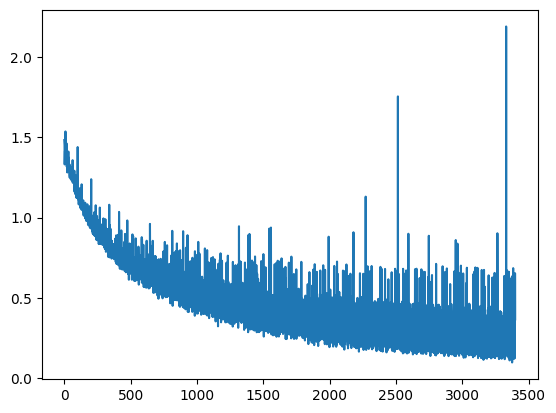

In [85]:
# Training 

num_epochs = 100
learning_rate = 0.01

input_size = 3
hidden_size = 2
num_layers = 1

num_classes = 4

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lstm = LSTMModel(input_size, hidden_size, num_layers, num_classes)
loss_list = []
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lstm.parameters(), lr = learning_rate)




for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        
        inputs, targets =  inputs.to(device), targets.to(device)
    
        targets = targets.long()
        outputs = lstm(inputs)
        outputs
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())

    if epoch % 100 == 0:

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")

plt.plot(loss_list)
plt.show()

In [86]:

with torch.no_grad():
    lstm.eval()
    dataX, dataY = test_dataset.tensors
    dataX, dataY = dataX.to(device), dataY.to(device)
    train_pred = lstm(dataX)
    print("train predictions:",train_pred)
    
    train_pred = torch.sigmoid(train_pred)
    print("train predictions:",train_pred)

    data_pred = np.array(train_pred)
    data_pred = np.argmax(data_pred,axis =1)
    print('data predicitons:', data_pred)
    dataY_plot = dataY.data.cpu().numpy()
    

with torch.no_grad():
            correct = 0
            total = 0
            for signals, labels in test_loader:
                signals = signals.to(device)
                labels = labels.to(device)
                outputs = lstm.eval()(signals)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            print(f"Validation Accuracy{ 100 * correct/total}")
            
            


train predictions: tensor([[ 0.0510, -1.4497,  2.1050, -1.6246],
        [ 0.0575, -1.4649,  2.1093, -1.6224],
        [ 0.0583, -1.4718,  2.1127, -1.6209],
        ...,
        [ 0.0581, -1.4773,  2.1161, -1.6195],
        [ 0.0581, -1.4773,  2.1161, -1.6195],
        [ 0.0581, -1.4773,  2.1161, -1.6195]])
train predictions: tensor([[0.5128, 0.1900, 0.8914, 0.1646],
        [0.5144, 0.1877, 0.8918, 0.1649],
        [0.5146, 0.1867, 0.8921, 0.1651],
        ...,
        [0.5145, 0.1858, 0.8925, 0.1653],
        [0.5145, 0.1858, 0.8925, 0.1653],
        [0.5145, 0.1858, 0.8925, 0.1653]])
data predicitons: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 